In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\MEHTA\Documents\projects\mlproject\notebook\data\data.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [8]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [10]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [11]:
df['Age'] = lr.fit_transform(df['Age'])

In [12]:
df['City_Category'] = lr.fit_transform(df['City_Category'])


In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,0,0,0,0,1


In [14]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [15]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [16]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [17]:
X = df.drop("Purchase",axis=1)
y=df['Purchase']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)

In [26]:
from math import sqrt
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

3532.064160844491
0.1519298344512623
RMSE of Linear Regression Model is  4625.780306985817


In [27]:
from sklearn.tree import DecisionTreeRegressor
 
regressor = DecisionTreeRegressor(random_state = 0) 

In [28]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [29]:
dt_y_pred = regressor.predict(X_test)

In [30]:
print(mean_absolute_error(y_test, dt_y_pred))
print(r2_score(y_test, dt_y_pred))
print("RMSE of Decision Tree Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

2372.0357559134654
0.5521191505924365
RMSE of Decision Tree Model is  3361.633452177241


In [31]:
RFregressor = RandomForestRegressor(random_state = 0)  

In [32]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [33]:
rf_y_pred = RFregressor.predict(X_test)


In [34]:
print(mean_absolute_error(y_test, rf_y_pred))
print(r2_score(y_test, rf_y_pred))
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

2222.049109204734
0.6309821516972987
RMSE of Linear Regression Model is  3051.35541573242


In [35]:
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
xgb_y_pred = xgb_reg.predict(X_test)

In [37]:
print(mean_absolute_error(y_test, xgb_y_pred))
print(r2_score(y_test, xgb_y_pred))
print("RMSE of XGBoost Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

2144.8588298827412
0.67227891659979
RMSE of XGBoost Model is  2875.5525007114747


In [38]:
score = r2_score(y_test, xgb_y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 67.23


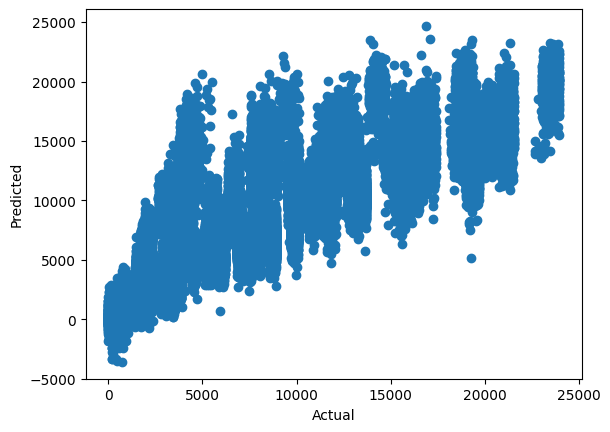

In [39]:
plt.scatter(y_test,xgb_y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

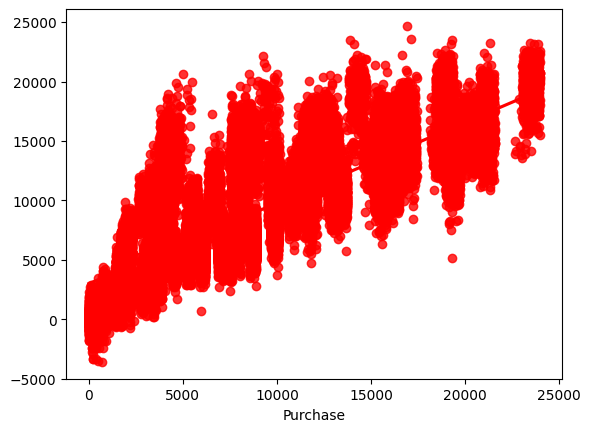

In [40]:
sns.regplot(x=y_test,y=xgb_y_pred,ci=None,color ='red');

In [41]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':xgb_y_pred,'Difference':y_test-xgb_y_pred})
pred_df

,Actual Value,Predicted Value,Difference
427227,3191,5326.647949,-2135.647949
546751,473,-560.653625,1033.653625
422348,18969,13386.923828,5582.076172
238930,12724,15424.162109,-2700.162109
145279,19615,14643.111328,4971.888672
...,...,...,...
30900,15335,13034.122070,2300.877930
83477,2851,3562.286377,-711.286377
309053,15482,15109.774414,372.225586
265403,1397,2778.979248,-1381.979248
